In [2]:
import pandas as pd
data1= pd.read_csv('https://raw.githubusercontent.com/pshah123/parkinsons-AI/master/parkinsons_updrs.data')
data1.head(3)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014


In [5]:
import pandas as pd 
import numpy as np 
import os, sys

#Extract the features and the predictors
data = pd.read_csv('https://raw.githubusercontent.com/pshah123/parkinsons-AI/master/parkinsons.data')
predictors = data.drop(['name'], axis = 1)
predictors = predictors.drop(['status'], axis = 1).as_matrix()
target = data['status']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1, 1))
X = scaler.fit_transform(predictors)
Y = target

#Split training data 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .25, random_state = 7)

#Create the K-Neaarest-Neighbors model
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from xgboost import  XGBClassifier
model = XGBClassifier()
model.fit(X_train, Y_train)
# make predictions
y_pred = model.predict(X_test)
# summarize the fit of the model
print("XGB Classisifer : ")
print(metrics.accuracy_score(Y_test, y_pred))
print(metrics.classification_report(Y_test, y_pred))
print(metrics.confusion_matrix(Y_test, y_pred))

XGB Classisifer : 
0.9591836734693877
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.95      1.00      0.97        39

    accuracy                           0.96        49
   macro avg       0.98      0.90      0.93        49
weighted avg       0.96      0.96      0.96        49

[[ 8  2]
 [ 0 39]]


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [2]:
import pandas as pd 
import numpy as np 

#Extract the features and the predictors
data = pd.read_csv('https://raw.githubusercontent.com/pshah123/parkinsons-AI/master/parkinsons.data')

from sklearn.preprocessing import MinMaxScaler
features = data.loc[:, data.columns != 'status'].values[:, 1:]
labels = data.loc[:, 'status'].values
labels[labels == 1].shape[0], labels[labels == 0].shape[0]

(147, 48)

In [29]:
data.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1, 1))
X = scaler.fit_transform(features)
Y = labels

In [5]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.14, random_state=7)
model =XGBClassifier()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

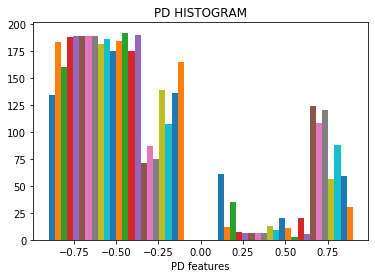

In [25]:
import matplotlib.pyplot as plt
plt.hist(X,bins =2)
plt.title('PD HISTOGRAM')
plt.xlabel("PD features")
plt.show()

In [28]:
X.mean()

-0.45009599942297557

In [17]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("accuracy is :",accuracy_score(Y_test, Y_pred)*100) # Test set accuracy

accuracy is : 96.42857142857143


In [15]:
print("classification_report is :\n",classification_report(Y_test, Y_pred)) # Full set accuracy

classification_report is :
               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.96      1.00      0.98        22

    accuracy                           0.96        28
   macro avg       0.98      0.92      0.94        28
weighted avg       0.97      0.96      0.96        28



In [14]:
print("confusion_matrix is:\n",confusion_matrix(Y_test,Y_pred))

confusion_matrix is:
 [[ 5  1]
 [ 0 22]]
